In [1]:
%matplotlib notebook

<h1 style="font-size:32px; text-align:center;"> Ordinary Least Squares</h1>
<h1 style="font-size:24px; text-align:center;">An Explanation and By-Hand Examples in Python</h1>
<h1 style="font-size:18px; text-align:center; margin-bottom:24px;">By Carl Lejerskar</h1>


In this notebook, I will briefly go over the theory behind Ordinary Least Squares regression. Thereafter I will go over three toy examples, performing OLS regression by hand. The first example will have a response that is a linear combination of two variables randomly sampled from the standard normal to demonstrate a perfect fit. The second exmaple will have a response that is a result of a quadratic function of the predictors; however, the quadratic term will be be weighted much less relative to other terms to demonstrate a "near-perfect" fit. The third example will feature a response that is a linear combination of the variables that have noise added to them, each element has an amount added to them that is randomly sampled from a uniform distribution ranging from -0.1 to 0.1.

### Theory:

In an Ordinary Least Squares model, the goal is to simply minimize the sum of squared errors. The error is the difference between the true response values used in training your model and what your model predicts:

<div style="text-align: center"> 
$\mathbf{e = \left(Y - \hat{Y}\right)}$
</div>

Where: 
<div style="text-align: center">
$\mathbf{Y = X\boldsymbol{\beta}}$ <br/>
$\mathbf{\hat{Y} = X\boldsymbol{\hat{\beta}}}$ <br/>
$\mathbf{X}$ is your data matrix, each column is a predictor's vector of values and each row is an observation. <br/>
$\mathbf{\boldsymbol{\beta}}$ is the vector true values of coefficients that one is trying to estimate.  <br/>
$\mathbf{\boldsymbol{\hat{\beta}}}$ is the vector of estimated values of coefficients
</div>

The sum of squared errors is: 

<div style="text-align: center"> 
$\mathbf{{e^Te}} = \sum\limits_{i=1}^n \mathbf{e_i^2}$</div>
</div>


When simply trying to minimize the sum of squared errors, the resulting value of $\mathbf{\hat{\boldsymbol{\beta}}}$ is $\mathbf{\left({X^T X}\right)^{-1}X^TY}$

**Proof**: $\mathbf{\hat{\boldsymbol{\beta}}} = \mathbf{\left({X^T X}\right)^{-1}X^TY}$


<div style="text-align: center"> 
$\mathbf{\min}\,\mathbf{{e^Te}}$</div>

<div style="text-align: center"> 
$\mathbf{\min\left(Y-\hat{Y}\right)^T\left(Y-\hat{Y}\right)}$</div>


<div style="text-align: center"> 
$\mathbf{\min\limits_{\boldsymbol{\beta}}\left(Y-X\boldsymbol{\beta}\right)^T\left(Y-X\boldsymbol{\beta}\right)}$</div>

<div style="text-align: center"> 
$\mathbf{\min\limits_{\boldsymbol{\beta}
}Y^TY-2Y^T\boldsymbol{\beta}
+\boldsymbol{\beta}
^TX^TX\boldsymbol{\beta}
}$



</div>

<div style="text-align: center"> 
$\mathbf{\frac{\large{\text{d}}}{\large{\text{d}\boldsymbol{\beta}
}}\left(Y^TY-2Y^TX
+\boldsymbol{\beta}
^TX^TX\boldsymbol{\beta}
\right)}$








</div>







<div style="text-align: center"> 



$\mathbf{{-2}X^TY + 2X^TX\boldsymbol{\beta} = 0} $ 




</div>






<div style="text-align: center"> 





$\mathbf{X^TX\boldsymbol{\beta} = X^TY } $ 



</div>






<p style= 'text-align: center;'><span style="font-family: arial;font-size: 20px;padding: 9px;border: 3px solid red;">$\mathbf{\hat{\boldsymbol{\beta}}} = \mathbf{\left({X^T X}\right)^{-1}X^TY}$</span></p></div>



### Implementation in Python

### Importing Packages

In [2]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from mpl_toolkits import mplot3d
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


### Linear Regression of Perfectly Linear Data

#### Generating Data

In [3]:
A = np.random.randn(100)
B = np.random.randn(100)
C = 50 + 2*A +3*B #response will be a linear combination of the predictors

#### Creating X matrix and Y vector

In [4]:
X = np.array([np.ones(100),A,B])
X = pd.DataFrame(np.transpose(X))
print('First few X values:','\n',X.head())
# Generating the response
y = C
y.shape = (100,1)
print('First few y values:','\n',y[0:5])

First few X values: 
      0         1         2
0  1.0 -0.247695 -0.908166
1  1.0 -0.090556 -0.124770
2  1.0 -0.684078  0.298785
3  1.0 -0.642315 -0.446845
4  1.0  0.638004  0.642847
First few y values: 
 [[46.78011082]
 [49.44457921]
 [49.5282001 ]
 [47.37483476]
 [53.20454947]]


#### Calculating $\mathbf{\hat{\boldsymbol{\beta}}}$ and $\mathbf{\hat{Y}}$

In [5]:
beta = ((inv(np.transpose(X) @ X) @ np.transpose(X))) @ y
beta
print('Beta hat values:','\n',beta)

Beta hat values: 
 [[50.]
 [ 2.]
 [ 3.]]


The values are exactly the values used in the equation to generate the Y values!

In [6]:
yhat = X @ beta
print('First few yhat values:','\n',yhat[0:5])

First few yhat values: 
            0
0  46.780111
1  49.444579
2  49.528200
3  47.374835
4  53.204549


#### Calculating $\mathbf{{e^Te}}$ (Sum of Squared Errors)

In [7]:
round(np.sum((y-yhat)**2),6) #Rounding to six digits past the decimal due to floating point precision

0    0.0
dtype: float64

Sum of Squared Errors is 0 as expected!

### Visualization

<IPython.core.display.Javascript object>


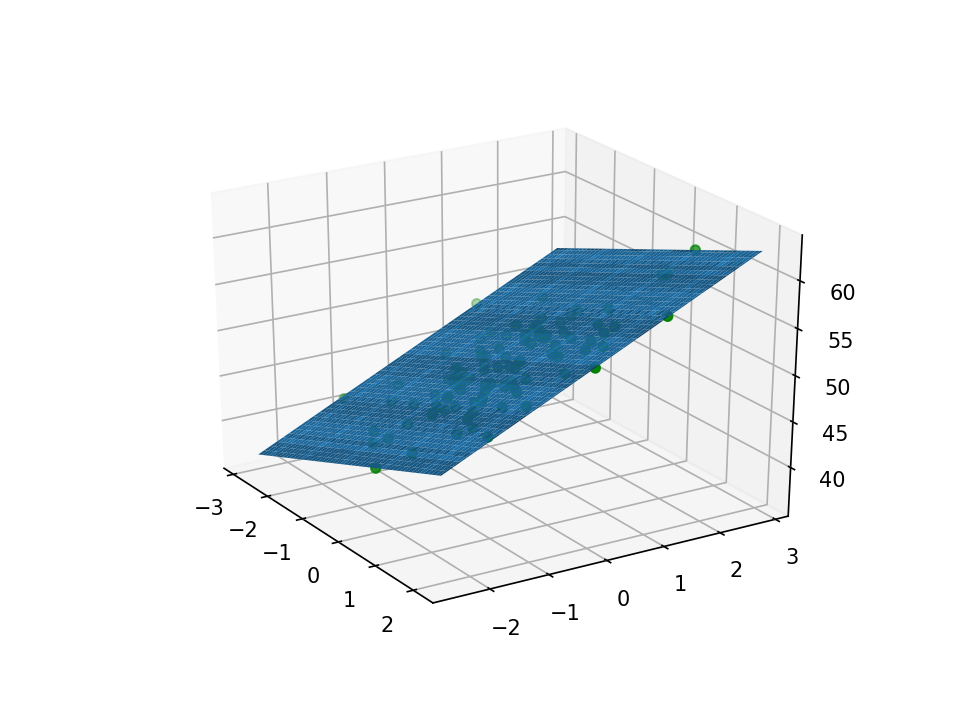

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a, b = np.meshgrid(np.linspace(X.loc[:,1].min(), X.loc[:,1].max(), 100), 
                       np.linspace(X.loc[:,2].min(), X.loc[:,2].max(), 100))

Z = beta[0] + beta[1] * a + beta[2] * b

fig = plt.figure()

ax = matplotlib.pyplot.axes(projection='3d')
ax.scatter3D(X.loc[:,1], X.loc[:,2],y, c="g")
surf = ax.plot_surface(a, b, Z)

Perfect fit! The points all lie on the plane.

### Linear Regression of Non-Linear Data

#### Generating Data

In [9]:
A = np.random.randn(100)
B = np.random.randn(100)
C = 50 + 2*A +3*B + 0.25*(B**2) #quadratic equation

#### Creating X matrix and Y vector

In [10]:
X = np.array([np.ones(100),A,B])
X = pd.DataFrame(np.transpose(X))
print('First few X values:','\n',X.head())
# Generating the response
y = C
y.shape = (100,1)
print('First few y values:','\n',y[0:5])

First few X values: 
      0         1         2
0  1.0  0.781987  0.234857
1  1.0  0.223403 -0.272023
2  1.0 -0.660249 -1.700514
3  1.0 -0.019418  2.432096
4  1.0 -1.306217  1.064094
First few y values: 
 [[52.28233375]
 [49.64923751]
 [44.30089592]
 [58.73622403]
 [50.86292421]]


#### Calculating $\mathbf{\hat{\boldsymbol{\beta}}}$ and $\mathbf{\hat{Y}}$

In [11]:
beta = ((inv(np.transpose(X) @ X) @ np.transpose(X))) @ y
beta
print('Beta hat values:','\n',beta)

Beta hat values: 
 [[50.28728294]
 [ 1.90545313]
 [ 3.1441226 ]]


The coefficients are slightly different than the ones used in the model due to the quadratic term.

In [12]:
yhat = X @ beta
print('First few yhat values:','\n',yhat[0:5])

First few yhat values: 
            0
0  52.515741
1  49.857695
2  43.682584
3  57.897090
4  51.143992


#### Calculating $\mathbf{{e^Te}}$ (Sum of Squared Errors)

In [13]:
round(np.sum((y-yhat)**2),6) #Rounding to six digits past the decimal

0    12.360589
dtype: float64

SSE is non-zero, but very small!

### Visualization

<IPython.core.display.Javascript object>


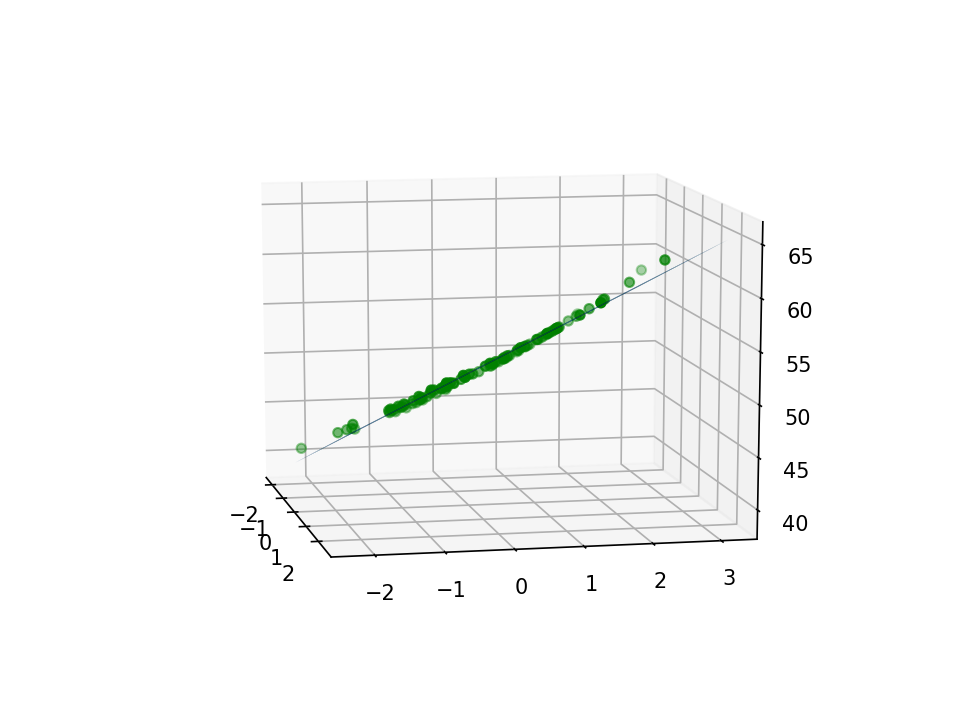

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a, b = np.meshgrid(np.linspace(X.loc[:,1].min(), X.loc[:,1].max(), 100), 
                       np.linspace(X.loc[:,2].min(), X.loc[:,2].max(), 100))

Z = beta[0] + beta[1] * a + beta[2] * b

fig = plt.figure()

ax = matplotlib.pyplot.axes(projection='3d')
ax.scatter3D(X.loc[:,1], X.loc[:,2],y, c="g")
surf = ax.plot_surface(a, b, Z)

Very close fit, but values are clearly off the plane!

### Linear Regression of Linear Data with Noise

#### Generating Data

In [15]:
A = np.random.randn(100)
B = np.random.randn(100)
A1 = []
B1 = []
for i in range(100):
    A1.append(np.random.uniform(-0.1,0.1,1))
    B1.append(np.random.uniform(-0.1,0.1,1))

C = 50 + 2*np.array(A1) +3*np.array(B1)

#### Creating X matrix and Y vector

In [16]:
X = np.array([np.ones(100),A,B])
X = pd.DataFrame(np.transpose(X))
print('First few X values:','\n',X.head())
# Generating the response
y = C
y.shape = (100,1)
print('First few y values:','\n',y[0:5])

First few X values: 
      0         1         2
0  1.0 -1.123196  0.950485
1  1.0 -0.187316 -0.076076
2  1.0 -1.252777 -0.339868
3  1.0  0.757401  0.846877
4  1.0 -0.662676 -0.654733
First few y values: 
 [[49.71293229]
 [49.89238638]
 [50.21578447]
 [50.18943094]
 [49.74137953]]


#### Calculating $\mathbf{\hat{\boldsymbol{\beta}}}$ and $\mathbf{\hat{Y}}$

In [17]:
beta = ((inv(np.transpose(X) @ X) @ np.transpose(X))) @ y
beta
print('Beta hat values:','\n',beta)

Beta hat values: 
 [[ 4.99808385e+01]
 [-2.37386859e-02]
 [-1.32846630e-02]]


The coefficients are slightly different than the ones used in the model due to the noise.

In [18]:
yhat = X @ beta
print('First few yhat values:','\n',yhat[0:5])

First few yhat values: 
            0
0  49.994875
1  49.986296
2  50.015093
3  49.951608
4  50.005267


#### Calculating $\mathbf{{e^Te}}$ (Sum of Squared Errors)

In [19]:
round(np.sum((y-yhat)**2),6) #Rounding to six digits past the decimal

0    4.333688
dtype: float64

Sum of Squared Errors is slightly larger than 0 as the predicted values are slightly different from the actual response values due to the added noise.

### Visualization

<IPython.core.display.Javascript object>


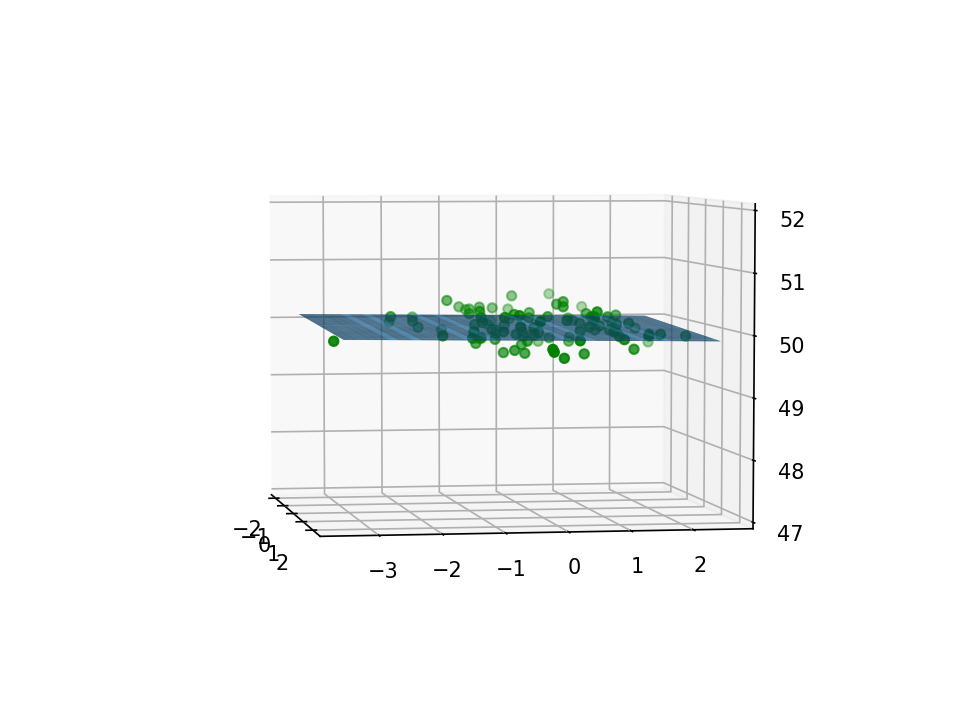

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a, b = np.meshgrid(np.linspace(X.loc[:,1].min(), X.loc[:,1].max(), 100), 
                       np.linspace(X.loc[:,2].min(), X.loc[:,2].max(), 100))

Z = beta[0] + beta[1] * a + beta[2] * b

fig = plt.figure()

ax = matplotlib.pyplot.axes(projection='3d')
ax.set_zlim3d(47,52)
ax.scatter3D(X.loc[:,1], X.loc[:,2],y, c="g")
surf = ax.plot_surface(a, b, Z)

Here you can see that many points do not lay on the plane, but are uniformly distributed above and below the plane due the added noise.

### Conclusions

In this notebook its is clear to see that OLS estimates the correct parameters when there is an exact linear relationship between the response and the predictors. This however will never be the case in practice, and we see two cases where there is error in the predictions: the true function may not be linear, or there may be noise within the data.